In [1]:

import streamlit as st
import numpy as np
import pandas as pd
import plotly.express as px
import time 

In [6]:
# Load the data for male and female
df_male = pd.read_csv('pwv_male_grouped.csv', header=0)
df_female = pd.read_csv('pwv_female_grouped.csv', header=0)


### THIS DATA MEANS XYZ


In [7]:
df_male

,Diet,Time_on_Diet,count,mean,std,min,25%,50%,75%,max
0,Control,6,5.0,2.860600,0.326757,2.419,2.74500,2.8080,3.04300,3.288
1,Control,8,14.0,2.889500,1.333323,1.254,2.25125,2.5435,3.09975,5.769
2,Control,9,4.0,1.707000,0.514739,0.983,1.58075,1.8245,1.95075,2.196
3,Control,11,5.0,2.846600,1.079162,1.277,2.56000,2.9170,3.23300,4.246
4,Control,14,5.0,3.023200,0.645270,2.143,2.59700,3.2350,3.39000,3.751
5,Control,15,9.0,2.491889,0.788938,1.363,2.07300,2.4100,3.15100,3.543
6,Control,22,4.0,2.388250,0.264860,2.007,2.30925,2.4880,2.56700,2.570
7,HF,6,5.0,3.077400,0.359925,2.762,2.76700,3.0120,3.22400,3.622
8,HF,8,14.0,4.619286,1.554174,2.690,3.34025,4.4835,5.83150,7.946
9,HF,9,5.0,3.381000,1.042427,2.535,2.83700,2.8620,3.54700,5.124


In [8]:
df_female

,Diet,Time_on_Diet,count,mean,std,min,25%,50%,75%,max
0,Control,6,5.0,2.780200,0.386238,2.232,2.71300,2.7340,2.92300,3.299
1,Control,8,10.0,2.989300,0.925959,1.863,2.22500,2.8700,3.58650,4.678
2,Control,9,4.0,1.677500,0.598481,0.840,1.50375,1.8130,1.98675,2.244
3,Control,11,5.0,2.756600,1.010607,2.135,2.21700,2.2380,2.66700,4.526
4,Control,14,5.0,3.056000,0.432659,2.390,2.97400,3.0510,3.34600,3.519
5,Control,15,9.0,2.409111,1.061740,1.391,1.80300,1.9430,2.78000,4.782
6,Control,22,9.0,2.547222,0.896368,1.674,1.82900,1.9190,3.14600,4.023
7,HF,6,5.0,2.246400,0.564663,1.732,1.91000,2.1350,2.26800,3.187
8,HF,8,10.0,3.476500,1.568892,1.536,2.60675,2.9105,4.12450,6.180
9,HF,9,4.0,3.451250,1.094193,2.567,2.63075,3.1655,3.98600,4.907


In [9]:
df_male['sex'] = 'Male'
df_female['sex'] = 'Female'

# Concatenate the dataframes
df_combined = pd.concat([df_male, df_female])

# Create a new column that combines 'sex' and 'diet' for the X-axis
#df_combined['group'] = df_combined['sex'] + ' ' + df_combined['diet']



In [10]:
df_combined.rename(columns={'Diet': 'diet'}, inplace=True)

In [12]:
df_combined.drop(columns=['count','std', 'min', '25%', '75%', 'max'], inplace=True)

In [20]:
df_combined.to_csv('pwv_combined.csv', index=False)


In [31]:
import streamlit as st
import pandas as pd
import seaborn as sns

# Assuming df_combined is already defined and contains the necessary data
df_combined = pd.read_csv('pwv_combined.csv')
# Let users select columns to plot (mean and 50% columns)
selected_columns = st.multiselect(
    'Select columns to plot:', 
    options=['mean', '50%'],  # Only mean and 50% columns
    default=['mean', '50%']  # Default to both columns
)

# Filter the DataFrame based on selected columns
df_selected = df_combined[['Time_on_Diet', 'group'] + selected_columns]

# Melt the DataFrame for easier plotting (long format)
df_melted = df_selected.melt(id_vars=['Time_on_Diet', 'group'], 
                             value_vars=selected_columns, 
                             var_name='Metric', 
                             value_name='Value')

# Plot the data using Plotly Express
fig = px.line(df_melted, x='Time_on_Diet', y='Value', color='group', line_dash='Metric', 
              title='Pulse Wave Velocity over Time', 
              labels={'Value': 'Pulse Wave Velocity', 'Time_on_Diet': 'Time on Diet (weeks)'})

# Display the plot in Streamlit
st.plotly_chart(fig)

2024-12-04 14:56:37.931 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-04 14:56:37.932 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-04 14:56:37.932 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-04 14:56:37.933 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-04 14:56:37.934 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-04 14:56:37.982 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-04 14:56:37.983 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-04 14:56:37.984 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [14]:
df_combined['group'] = df_combined['sex'] + ' ' + df_combined['diet']

In [16]:
df_combined.drop(columns=['diet', 'sex'], inplace=True)

In [21]:
pd.read_csv('pwv_combined.csv')

,Time_on_Diet,mean,50%,group
0,6,2.860600,2.8080,Male Control
1,8,2.889500,2.5435,Male Control
2,9,1.707000,1.8245,Male Control
3,11,2.846600,2.9170,Male Control
4,14,3.023200,3.2350,Male Control
5,15,2.491889,2.4100,Male Control
6,22,2.388250,2.4880,Male Control
7,6,3.077400,3.0120,Male HF
8,8,4.619286,4.4835,Male HF
9,9,3.381000,2.8620,Male HF


<Axes: xlabel='Time_on_Diet', ylabel='mean'>

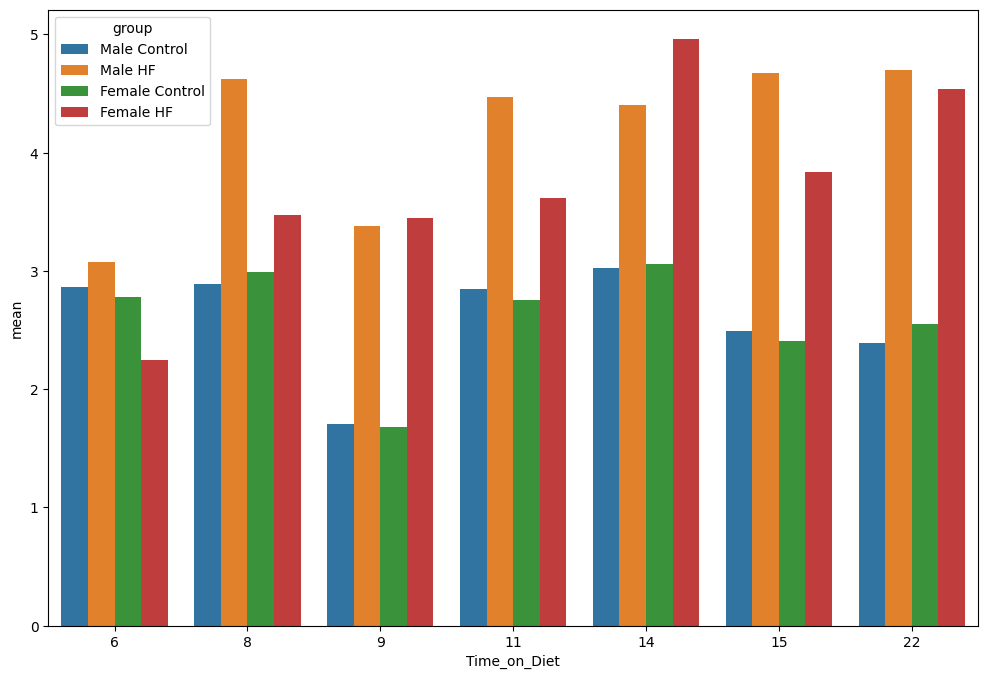

In [37]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df_combined, x='Time_on_Diet', y='mean', hue = 'group')

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_combined is already defined and contains the necessary data
# df_combined = ...

# Create a bar plot

# Plot mean values
df_combined_mean = df_combined[df_combined['group'] == 'mean']
plt.bar(df_combined_mean['Time_on_Diet'], df_combined_mean['mean'], label='Mean', alpha=0.7)
plt.show()

# Plot 50% values


/var/folders/t8/hfx194kd6yzdrrxbq5lttnq80000gp/T/ipykernel_6310/672187444.py:12: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



In [28]:
plt.bar(df_combined['Time_on_Diet'], df_combined['50%'], label='50%', alpha=0.7)
plt.show()

/var/folders/t8/hfx194kd6yzdrrxbq5lttnq80000gp/T/ipykernel_6310/1385333400.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



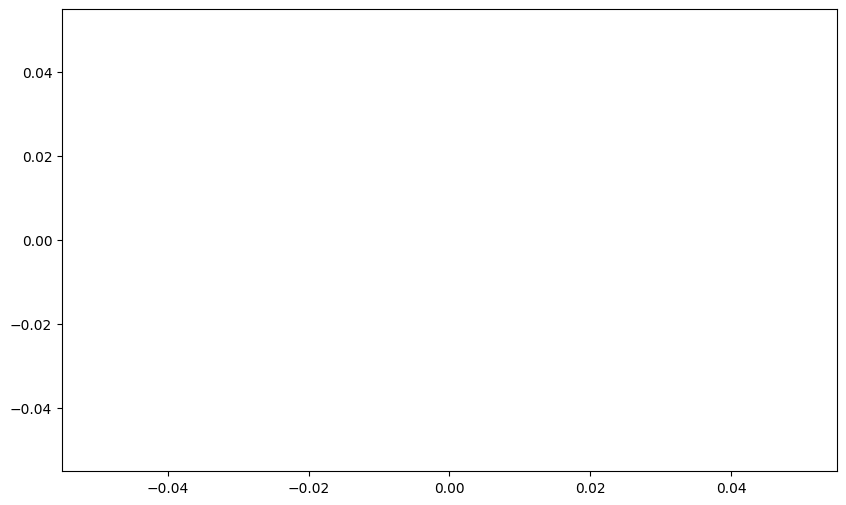

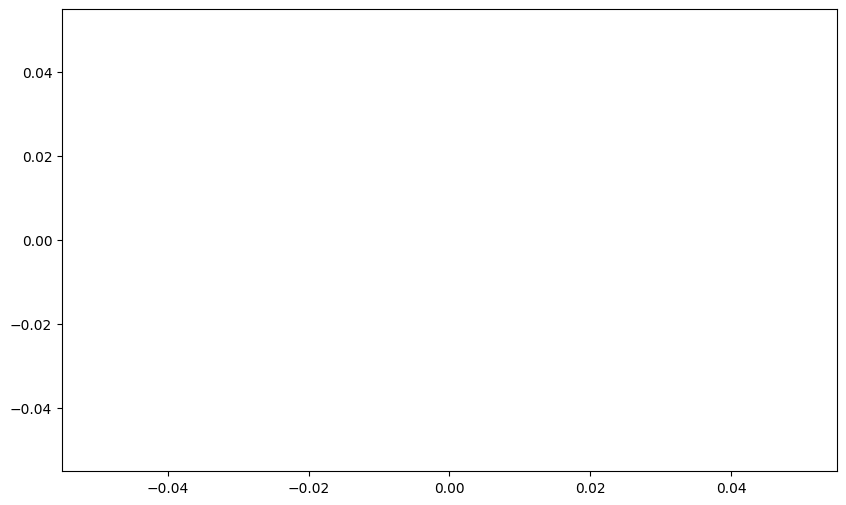

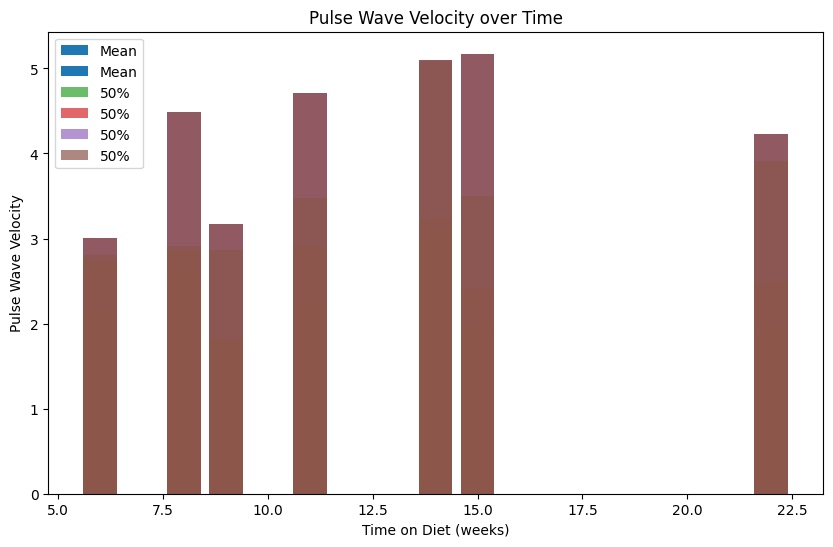

In [30]:
import matplotlib.pyplot as plt

# Ensure plots are displayed inline in the notebook
%matplotlib inline

# Create a bar plot for the '50%' column
plt.bar(df_combined['Time_on_Diet'], df_combined['50%'], label='50%', alpha=0.7)

# Add labels and title
plt.xlabel('Time on Diet (weeks)')
plt.ylabel('Pulse Wave Velocity')
plt.title('Pulse Wave Velocity over Time')
plt.legend()

# Show the plot
plt.show()